In [38]:
from helium import start_chrome,click
import pandas as pd
from bs4 import BeautifulSoup
import time

In [42]:
def scrap_transfer_market(url,id):
    driver=start_chrome(url)
    time.sleep(2)
    #click("Accepter et continuer") # to skip 
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    botola_teams=[]
    team_value = []
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    season_name=id
    market_value_table=soup.find('table',class_='items')
    for team in market_value_table.find_all('tbody'):
        rows=team.find_all('tr')
        season_list=[season_name]*len(rows)
        for row in rows: 
            teams=row.find('td',class_='hauptlink no-border-links').text.strip() 
            rechts_cells = row.find_all('td', class_='rechts')
            if rechts_cells:
                value = rechts_cells[-1].text.strip()  # Prendre la DERNIÈRE cellule
            else:
                value = None 
            botola_teams.append(teams)
            team_value.append(value)
    data={'teams':botola_teams,
          'saisaon':season_list,
          'team value':team_value}
    df = pd.DataFrame(data)
    driver.quit()
    return df

In [40]:
scrap = scrap_transfer_market("https://www.transfermarkt.fr/botola-pro-inwi/startseite/wettbewerb/MAR1/plus/?saison_id=2011",2011)
scrap.head()

,teams,saisaon,team value
0,Wydad Casablanca,2011,"3,10 mio. €"
1,Raja Club Athletic,2011,"2,63 mio. €"
2,FUS Rabat,2011,"1,55 mio. €"
3,Olympique Safi,2011,"1,15 mio. €"
4,Olympique Khouribga,2011,950 K €


In [43]:
ids = list(range(2009,2026))

In [44]:
ids = list(range(2009,2026))
data_transfer_market = pd.DataFrame()
for id in ids:
    url = f"https://www.transfermarkt.fr/botola-pro-inwi/startseite/wettbewerb/MAR1/plus/?saison_id={id}"
    data_transfer_market = pd.concat([data_transfer_market,scrap_transfer_market(url, id)]) 
    time.sleep(5)
data_transfer_market.to_excel(f"transfer market total.xlsx", index=False)

In [ ]:
def convert_market_value_to_numeric(value_str):
    
    if not value_str or value_str.strip() == '-':
        return None
    
    # Nettoyer la chaîne
    value_str = value_str.strip().replace('€', '').replace('.', '').replace(' ', '')
    
    # Remplacer la virgule par un point pour les décimales
    value_str = value_str.replace(',', '.')
    
    # Extraire le nombre et l'unité
    if 'mio' in value_str.lower():
        # Millions
        number = float(value_str.lower().replace('mio', ''))
        return int(number * 1_000_000)
    elif 'mds' in value_str.lower() or 'md' in value_str.lower():
        # Milliards
        number = float(value_str.lower().replace('mds', '').replace('md', ''))
        return int(number * 1_000_000_000)
    elif 'k' in value_str.lower():
        # Milliers
        number = float(value_str.lower().replace('k', ''))
        return int(number * 1_000)
    else:
        # Valeur simple sans unité
        try:
            return int(float(value_str))
        except:
            return 0


'5,51 mio. €' -> 5510000
'1,2 mds. €' -> 1200000000
'750 k €' -> 750000
'2,5 mio. €' -> 2500000
'500 €' -> 500
'' -> 0


In [50]:
data_transfer_market['team value'] = data_transfer_market['team value'].apply(convert_market_value_to_numeric)

In [55]:
saison = data_transfer_market[data_transfer_market['saisaon'] == 2023]
saison

,teams,saisaon,team value
0,Wydad Casablanca,2023,19150000
1,Raja Club Athletic,2023,18990000
2,AS FAR Rabat,2023,16090000
3,Renaissance de Berkane,2023,12740000
4,FUS Rabat,2023,9880000
5,MAS Fès,2023,8230000
6,Ittihad Tanger,2023,7330000
7,Olympique Safi,2023,7280000
8,Union Touarga Sportif,2023,7100000
9,Hassania d'Agadir,2023,6800000


Mesures de dispersion par saison:


saisaon  team value                                                \
            écart-type      variance coefficient_variation     range   
0     2009   902365.81  8.142641e+11                113.64   3000000   
1     2010  1409805.66  1.987552e+12                124.04   4380000   
2     2011   916018.05  8.390891e+11                113.57   3100000   
3     2012  2309178.05  5.332303e+12                 49.95   7680001   
4     2013  3108745.12  9.664296e+12                 66.12  11850000   
5     2014  2707401.89  7.330025e+12                 64.91   9100000   
6     2015  2211858.57  4.892318e+12                 53.03   8550000   
7     2016  1972693.59  3.891520e+12                 52.19   6320000   
8     2017  3464656.25  1.200384e+13                 31.04  13000000   
9     2018  3424379.20  1.172637e+13                 29.58  12080000   
10    2019  2553707.68  6.521423e+12                 34.36  10430000   
11    2020  2292721.45  5.256572e+12                 31.19   8350000   
12    2021  3010014.33  9.060186e+12                 36.29  10520000   
13    2022  4455718.63  1.985343e+13                 50.19  15390000   
14    2023  4786755.16  2.291302e+13                 51.55  14210000   
15    2024  4732217.06  2.239388e+13                 50.36  17730000   
16    2025  5115619.21  2.616956e+13                 70.20  18410000   

               
          IQR  
0   1038750.0  
1   1513750.0  
2    800000.0  
3   3292500.0  
4   4057500.0  
5   2757500.0  
6   2875000.0  
7   2277500.0  
8   3225000.0  
9   2317500.0  
10  1597500.0  
11  1857500.0  
12  2225000.0  
13  3685000.0  
14  4432500.0  
15  5717500.0  
16  5207500.0

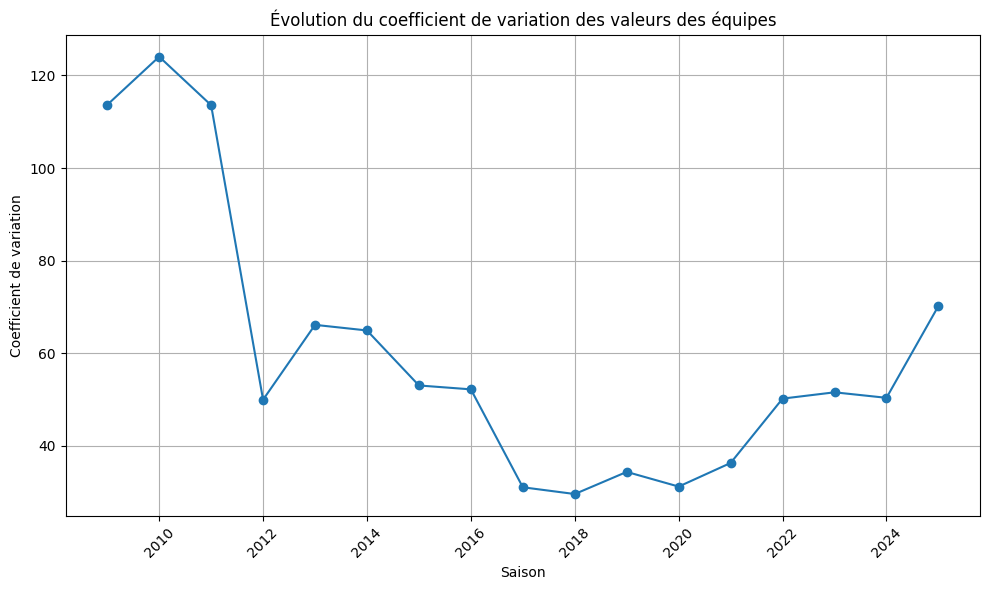

In [57]:
# Calculer plusieurs mesures de dispersion par saison
dispersion_measures = data_transfer_market.groupby('saisaon').agg({
    'team value': [
        ('écart-type', 'std'),
        ('variance', 'var'),
        ('coefficient_variation', lambda x: (x.std() / x.mean()) * 100 if x.mean() != 0 else 0),
        ('range', lambda x: x.max() - x.min()),
        ('IQR', lambda x: x.quantile(0.75) - x.quantile(0.25))
    ]
}).round(2)

# Réinitialiser l'index pour avoir saisaon comme colonne
dispersion_measures = dispersion_measures.reset_index()

# Afficher les résultats
print("Mesures de dispersion par saison:")
display(dispersion_measures)

# Optionnel: Créer un graphique de l'évolution de la dispersion
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(dispersion_measures['saisaon'], dispersion_measures[('team value', 'coefficient_variation')], 
         marker='o', linestyle='-')
plt.title('Évolution du coefficient de variation des valeurs des équipes')
plt.xlabel('Saison')
plt.ylabel('Coefficient de variation')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()